# Monte Carlo for the Margrabe option - Code

This is the code developed for the implementation of the project about Monte Carlo for the Margrabe option.

I have decided to use a Jupyter Notebook for Python code for various reasons.

First, it allows to write inline comments, documentation and explanations alongside code cells in a nice format. This feature promotes a more effective communication of the results and of the purpose, the logic and the usage of the code. In addition, Jupyter Notebooks allow to execute Python code cells individually or collectively, producing immediate outputs, results, plots, tables, statistics. For this motive, Jupyter Notebooks facilitate data visualization, exploration and analysis: crucial points of this project.

Even if Jupyter Notebooks may not be the ideal platform for creating highly modular and scalable software solutions, it is possible to create separate modules by grouping similar functions in the same sections.

Concerning the project, I have divided the code into an operational panel and a set of functions. In the operational panel, we can initialize the inputs, execute the functions, publish the outputs and produce the plots. In the second part there are the functions developed for the realization of the project, seprated into modules.

**Important**: before running the operation panel, you need to perform the functions in the second part.

## Operating panels

### Inputs

In the next cell we can set the inputs connected to the financial model.

In [23]:
S1_0 = 60   # spot price of the first security
S2_0 = 60   # spot price of the second security

q1 = 0.01   # dividend yield of the first security
q2 = 0.01   # dividend yield of the second security

v1 = 0.05   # volatility of the first security
v2 = 0.25   #volatility of the second security
corr = -0.9   # correlation between the two securities

r = 0.05   # annual risk-free rate

T = 1   # maturity (years)

In the next cell we plot the trend of the value of the securities overtime, in order to get an idea about the parameter we have set. We need to fix the number of monitoring dates to specify the discrete time points at which the value of the securities is computed (depending on their distribution under the risk neutral probability measure) and represented.

    Time (years)         S1         S2
0       0.000000  60.000000  60.000000
1       0.083333  59.187855  62.130238
2       0.166667  59.028588  60.223406
3       0.250000  60.045368  58.442173
4       0.333333  59.470727  61.324863
5       0.416667  59.922190  62.210724
6       0.500000  60.776639  62.073045
7       0.583333  62.385199  54.118586
8       0.666667  60.848903  63.874756
9       0.750000  61.362067  58.794961
10      0.833333  59.810078  71.423028
11      0.916667  60.544819  64.696348
12      1.000000  61.739089  60.704286


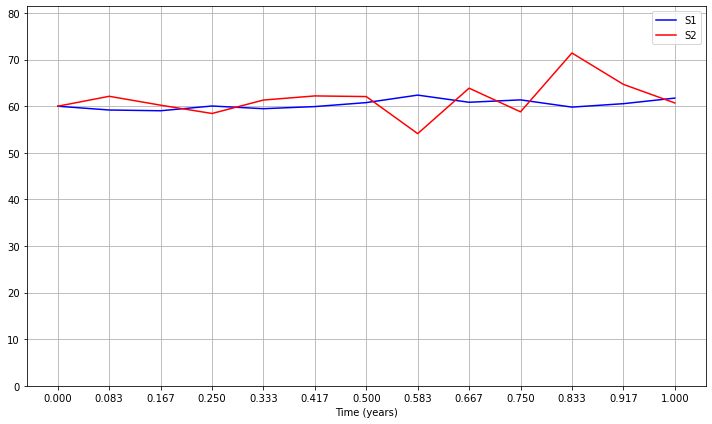

In [24]:
n_steps = 12   # n^ of monitoring dates

plotPaths(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, n_steps)

### Margrabe Option Pricing: Monte Carlo and Closed-form

In the next cell we compute the Monte Carlo estimate of the price of the Margrabe option at 0, whose payoff at maturity is $X(T) = \max\{ S_1(T) - S_2(T), 0 \}$


N is the number of replication for the Monte Carlo simulation, that can be decided by the user.
If the user wants, he can set plot_simulations to True in order to represent the distirbution of the simulated securities under a fixed number of bins.

In [26]:
N = 1000   # n^ of replications

MCMargrabe = BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, plot_simulations = False, bins = 12)
MCMargrabe

6.9630392275722865

In the next cell we rely on the closed-form solution for the price of the Margrabe option at 0, given the initial data we have set.

In [27]:
BSMargrabe = BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
BSMargrabe

6.984596790707634

In the next cells we compute the absolute error and the relative error of the MC estimate with respect to the closed-form solution.

In [28]:
absolute_error = abs(BSMargrabe - MCMargrabe)
# absolute_error = np.round(absolute_error, 2)
absolute_error

0.021557563135347735

In [29]:
relative_error = absolute_error / BSMargrabe
relative_error

0.0030864434671487545

The next cell provides the MC estimate of the price of the Margrabe option at 0, along with the corresponding radius of the confidence interval and its bounds. The user can also fix the number of replications and the confidence level (by default it's 95%).

In [30]:
N = 1000   # n^ of replications

BSMargrabeOptionMCPlus(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95)

{'MC_price': 6.3726257779290645,
 'radius_CI': 0.5405300532782393,
 'LB_MC': 5.832095724650825,
 'UB_MC': 6.913155831207304}

In the next cell, we build a table and a plot representing the Monte Carlo estimate as the sample size increases, as well as its estimated confidence intervals. The user can set the confidence level and an array containing the sample sizes he is interested in.

  N_simulations  MC_price  radius_CI     LB_MC      UB_MC  BS_price
0            10  5.836970   5.353016  0.483954  11.189986  6.984597
1            50  6.823908   2.777118  4.046791   9.601026  6.984597
2           100  6.048709   1.796224  4.252485   7.844933  6.984597
3           500  7.218274   0.820965  6.397309   8.039238  6.984597
4          1000  6.295124   0.528259  5.766865   6.823382  6.984597
5          2500  7.093995   0.355564  6.738431   7.449559  6.984597
6          5000  7.058415   0.256699  6.801716   7.315113  6.984597
7          7500  6.959041   0.204018  6.755023   7.163060  6.984597
8         10000  6.960506   0.178326  6.782179   7.138832  6.984597


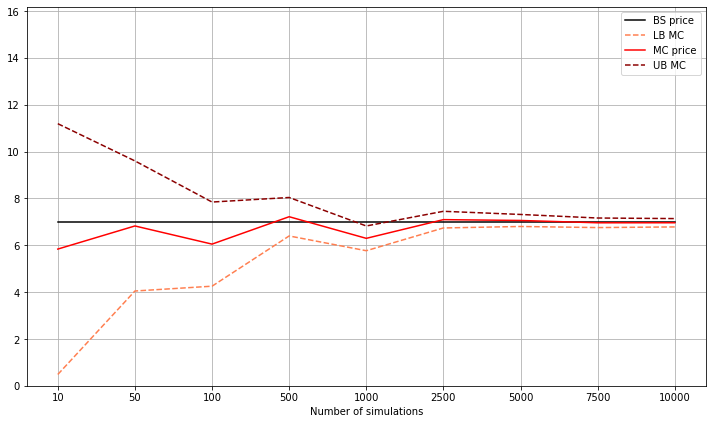

In [31]:
N_array = [10, 50, 100, 500, 1000, 2500, 5000, 7500, 10000]

BSMargrabeOptionMC_MultipleSampleSizes(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N_array, confidence_level = 0.95)

### Variance Reduction Techniques

The next cell provides the **Control Variate estimate** of the price of the Margrabe option at 0, along with the corresponding radius of the confidence interval and its bounds. See the documentation in the bottom or the report for insights about the method.

In [32]:
N = 1000   # n^ of replications

BSMargrabeOption_ControlVariate(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95)

{'CV_price': 7.110244296499515,
 'CV_radius_CI': 0.30172871978649907,
 'LB_CV': 6.808515576713017,
 'UB_CV': 7.411973016286014}

The next cell provides the **Antithetic Monte Carlo estimate** of the price of the Margrabe option at 0, along with the corresponding radius of the confidence interval and its bounds.

In [33]:
N = 1000   # n^ of replications

BSMargrabeOption_AntitheticVariate(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95)

{'AV_price': 6.832782814668653,
 'AV_radius_CI': 0.25622717071775514,
 'LB_AV': 6.576555643950898,
 'UB_AV': 7.089009985386409}

### Variance Reduction Techniques - Comparison

The following three plots represent the distribution of the absolute errors between the simulated price of the option and the closed-form solution under the different methods (Monte Carlo, Control Variate, Antithetic Variate), in order to have a hint about the performance.

- N is the number of replications for each Monte Carlo estimate;
- n_estimates is needed to fix the number of different Monte Carlo estimates to compute, consequently it corresponds to the number of different absolute errors used to represent the distribution;
- bins is needed to plot the specific distribution.

Choose the method to estimate the price of the Margrabe option at 0 (MC, CV, AV): MC



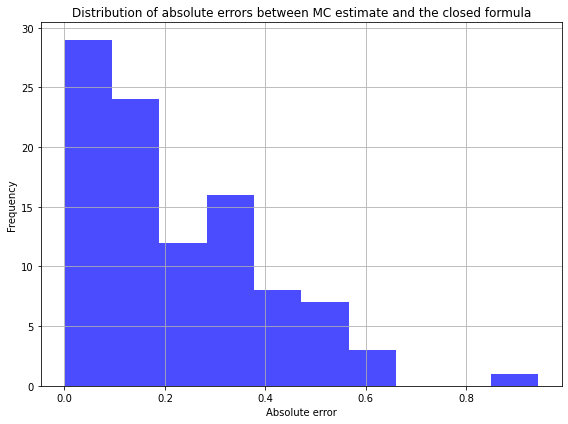

In [34]:
N = 1000
n_estimates = 100
bins = 10

BSMargrabeOption_ErrorDistribution(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, n_estimates, bins)

Choose the method to estimate the price of the Margrabe option at 0 (MC, CV, AV): AV



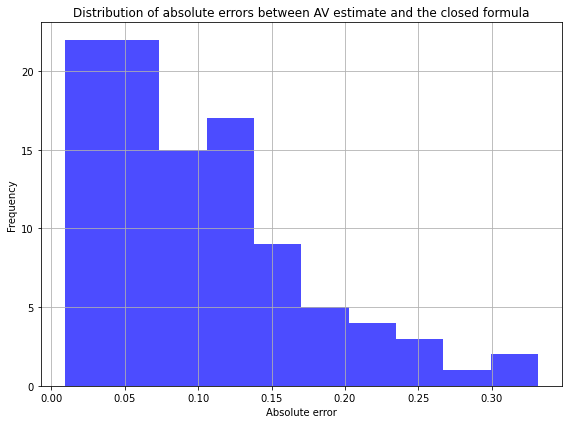

In [35]:
n_estimates = 100
bins = 10

BSMargrabeOption_ErrorDistribution(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, n_estimates, bins)

Choose the method to estimate the price of the Margrabe option at 0 (MC, CV, AV): AV



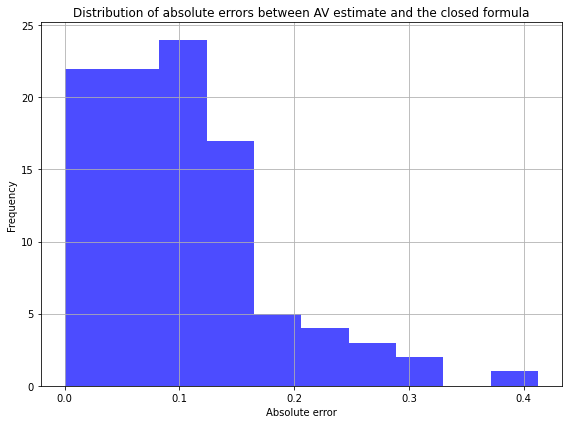

In [36]:
n_estimates = 100
bins = 10

BSMargrabeOption_ErrorDistribution(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, n_estimates, bins)

In the next cell, we represent the estimated price of the option at 0 under the three different methods, along with the bound of the corresponding confidence interval. Finally, it is represented the closed-form solution. The discussion of the results is let to the report.

               method  estimated_price  radius_CI        LB        UB  \
0         Monte_Carlo         7.296087   0.586242  6.709846  7.882329   
1     Control_Variate         7.146167   0.306432  6.839735  7.452599   
2  Antithetic_Variate         6.990168   0.266211  6.723957  7.256378   

   BS_price  
0  6.984597  
1  6.984597  
2  6.984597  


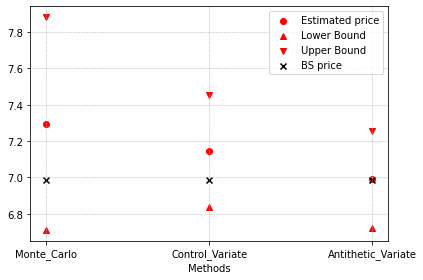

In [37]:
N = 1000

BSMargrabeOption_CompareMethods(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95)

### Sensitivity Analysis - Single Parameter

Next, we conduct a sensitivity analysis on the most important parameters for Margrabe option pricing. The primary goal is to understand how variations in a particular input affect the calculated option price. In particular, we consider v1, v2, corr and S1_0 as parameters. In the future the code could be extended to include additional parameters. It would be sufficient to add a proper function in the dedicated dictionary in sensitivity_analysis_1param, consenting scalability.

The analysis consists in computing the price of the option at 0 for different values of a certain parameter, chosen by the user. In particular, we consider a discrete set of values of the parameter between a minimum and a maximum chosen by the user (the system checks that they are eligible). Lastly, the sensitivity analysis is conducted with both the MC price and the closed-form solution price. The output consists in a table with the possible values of the parameter and the corresponding prices (simulated and not) and an ad hoc plot.

The analysis of the results is let to the report.

Choose the parameter for which to analyze sensitivity (v1, v2, corr, S1_0): v1

Choose the mininum value for v1 (>= 0): 0.02
Choose the maximum value for v1 (> than the previous): 0.3
Choose the number of values you want, including the minimum and the maximum (>= 2): 15

      v1   MC_price   BS_price
0   0.02   6.543720   6.335535
1   0.04   7.044564   6.767158
2   0.06   7.409402   7.202962
3   0.08   7.295919   7.642073
4   0.10   7.823355   8.083794
5   0.12   8.303243   8.527557
6   0.14   8.802888   8.972898
7   0.16   9.492062   9.419431
8   0.18   9.245778   9.866829
9   0.20  10.747609  10.314816
10  0.22  10.976543  10.763155
11  0.24  10.792240  11.211638
12  0.26  11.470465  11.660085
13  0.28  12.635494  12.108334
14  0.30  12.235006  12.556242


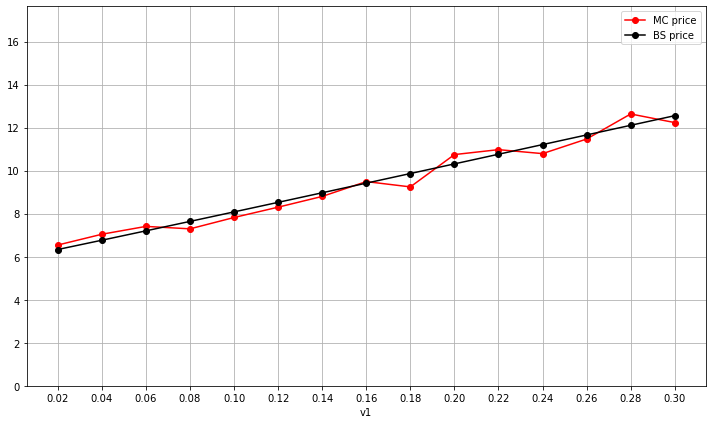

In [43]:
sensitivity_analysis_1param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

Choose the parameter for which to analyze sensitivity (v1, v2, corr, S1_0): v2

Choose the mininum value for v2 (>= 0): 0.02
Choose the maximum value for v2 (> than the previous): 0.3
Choose the number of values you want, including the minimum and the maximum (>= 2): 15

      v2  MC_price  BS_price
0   0.02  1.628982  1.624360
1   0.04  2.255613  2.078856
2   0.06  2.522167  2.540149
3   0.08  2.980762  3.004969
4   0.10  3.838222  3.471752
5   0.12  4.165015  3.939646
6   0.14  4.080080  4.408142
7   0.16  5.058117  4.876905
8   0.18  5.139582  5.345704
9   0.20  5.903922  5.814366
10  0.22  6.233418  6.282756
11  0.24  6.200646  6.750765
12  0.26  6.941864  7.218299
13  0.28  7.486761  7.685277
14  0.30  8.047609  8.151625


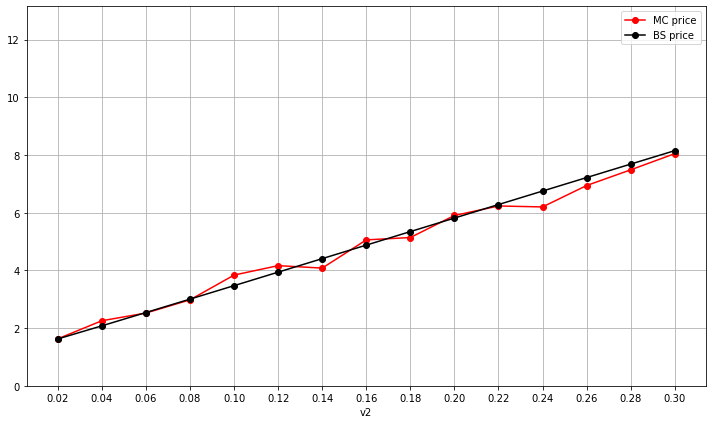

In [45]:
sensitivity_analysis_1param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

Choose the parameter for which to analyze sensitivity (v1, v2, corr, S1_0): corr

Choose the mininum value for the correlation (between -1 and 1): -1
Choose the maximum value for the correlation (between -1 and 1 and > than the previous): 1
Choose the number of values you want, including the minimum and the maximum (>= 2): 21

    correlation  MC_price  BS_price
0          -1.0  7.037754  7.082938
1          -0.9  5.947010  6.984597
2          -0.8  6.751882  6.884809
3          -0.7  6.957729  6.783511
4          -0.6  6.644075  6.680633
5          -0.5  6.309082  6.576103
6          -0.4  6.655836  6.469840
7          -0.3  5.859864  6.361756
8          -0.2  5.679745  6.251758
9          -0.1  6.135059  6.139743
10          0.0  6.230256  6.025597
11          0.1  5.566992  5.909199
12          0.2  5.737434  5.790410
13          0.3  5.808923  5.669083
14          0.4  5.693812  5.545049
15          0.5  5.076119  5.418123
16          0.6  5.417439  5.288096
17          0.7  5.3215

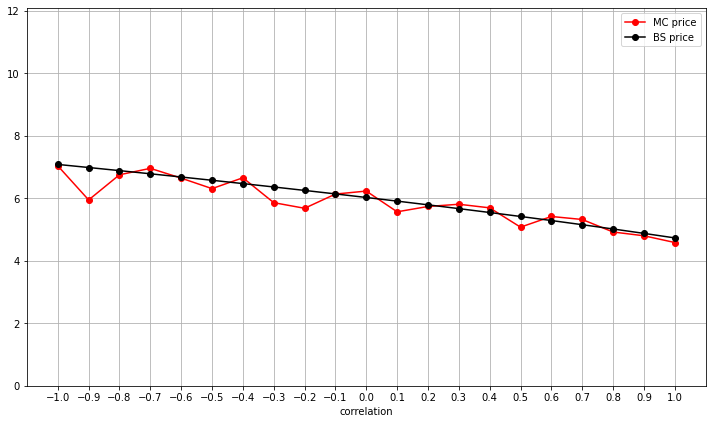

In [49]:
sensitivity_analysis_1param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

Choose the parameter for which to analyze sensitivity (v1, v2, corr, S1_0): S1_0

Choose the mininum value for S1_0 (> 0): 10
Choose the maximum value for S1_0 (> than the previous): 100
Choose the number of values you want, including the minimum and the maximum (>= 2): 10

    S1_0   MC_price      BS_price
0   10.0   0.000000  7.722408e-10
1   20.0   0.000000  2.456592e-04
2   30.0   0.031762  3.969184e-02
3   40.0   0.545235  5.566443e-01
4   50.0   2.834641  2.618774e+00
5   60.0   6.911644  6.984597e+00
6   70.0  13.442615  1.351194e+01
7   80.0  21.758946  2.156952e+01
8   90.0  30.842516  3.053646e+01
9  100.0  40.273667  3.998722e+01


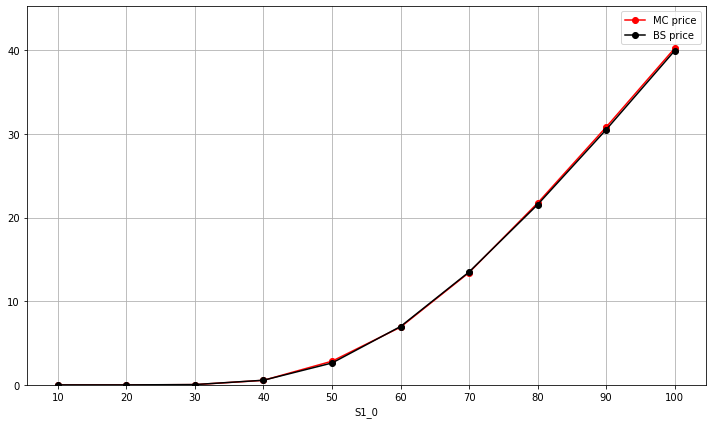

In [50]:
sensitivity_analysis_1param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

### Sensitivity Analysis - Two Parameters

Next, we conduct a sensitivity analysis involving two parameters. We examine how changes in two specific parameters (taken from v1, v2, corr) simultaneously influence the output, namely the Margrabe option price). This analysis helps in understanding the relative importance of each parameter and can guide decision-making or risk management processes.

For each parameter in the couple chosen by the user, an interval is defined (minimum and maximum values). The range is then divided into discrete steps or values. The combination of values from both parameters forms a grid or matrix. For each combination of parameter values in the grid, the Margrabe option price is simulated using MC. The function computes the closed-form solution too.

Finally, a contour plot is generated for both MC estimates and closed-form solutions. Each cell or region represents the option price for a specific combination of parameter values.

Choose the first parameter for which to analyze sensitivity (v1, v2, corr): v1
Choose the second parameter for which to analyze sensitivity, different from the previouos (v1, v2, corr): v2

Choose the mininum value for v1 (>= 0): 0.02
Choose the maximum value for v1 (> than the previous): 0.3

Choose the mininum value for v2 (>= 0): 0.02
Choose the maximum value for v2 (> than the previous): 0.3

Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): 15



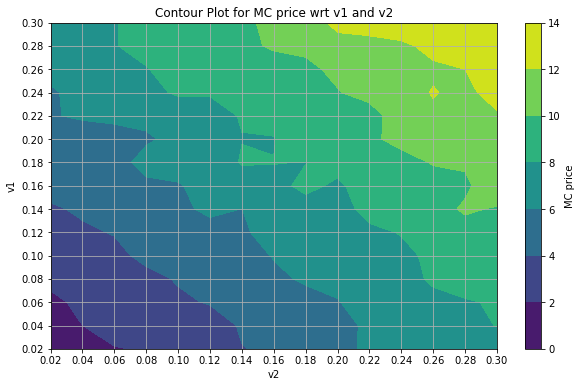

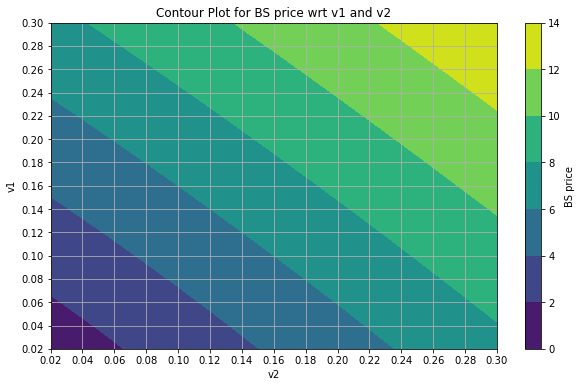

In [56]:
sensitivity_analysis_2param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

Choose the first parameter for which to analyze sensitivity (v1, v2, corr): v1
Choose the second parameter for which to analyze sensitivity, different from the previouos (v1, v2, corr): corr

Choose the mininum value for the correlation (between -1 and 1): -1
Choose the maximum value for the correlation (between -1 and 1 and > than the previous): 1

Choose the mininum value for v1 (>= 0): 0.01
Choose the maximum value for v1 (> than the previous): 0.2

Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): 20



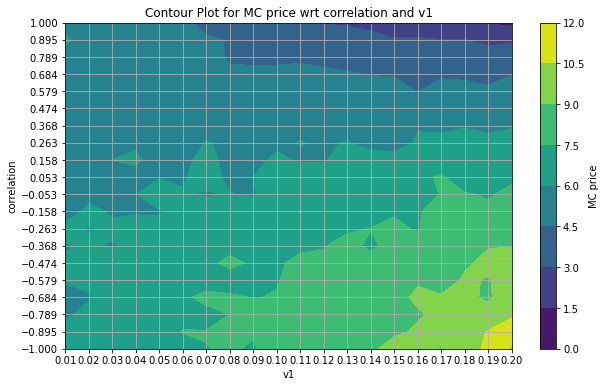

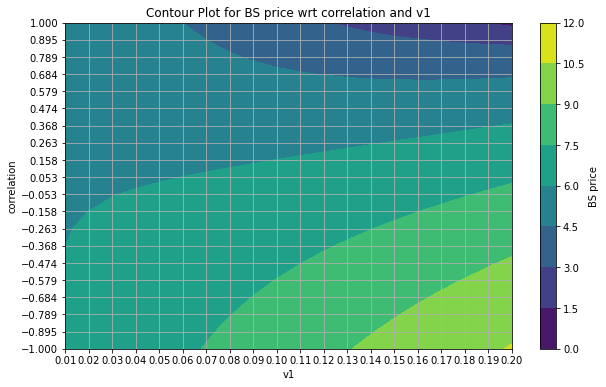

In [57]:
sensitivity_analysis_2param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

Choose the first parameter for which to analyze sensitivity (v1, v2, corr): v2
Choose the second parameter for which to analyze sensitivity, different from the previouos (v1, v2, corr): corr

Choose the mininum value for the correlation (between -1 and 1): 0
Choose the maximum value for the correlation (between -1 and 1 and > than the previous): 1

Choose the mininum value for v2 (>= 0): 0.1
Choose the maximum value for v2 (> than the previous): 0.25

Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): 15



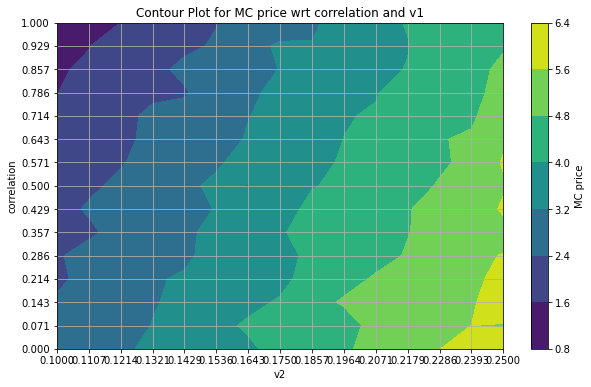

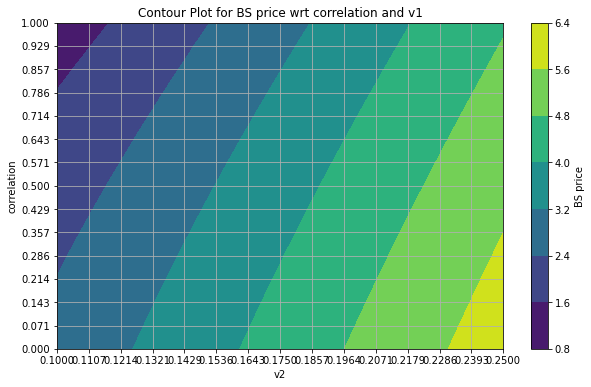

In [59]:
sensitivity_analysis_2param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)

## Functions

### Importing Required Libraries and Modules for Financial and Statistical Analysis

In [2]:
from math import exp, log, pi, sqrt
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Stock Price Simulation and Visualization


<b>riskyStocksPoint</b>: Calculate the future prices of two risky stocks using the Black-Scholes model under the risk neutral probability measure.
    
    Parameters:
    - S1, S2: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - deltat: Time step for the simulation.
    - antithetic_variables: Flag for using antithetic variables for variance reduction.
    
    Returns:
    - List containing future stock prices for stocks 1 and 2.
    - If antithetic_variables is True, returns a list containing the antithetic pair of future stock prices for stocks 1 and 2.

In [3]:
def riskyStocksPoint(S1, S2, q1, q2, v1, v2, corr, r, deltat, antithetic_variables = False):
    z = np.random.normal(size = 2)
    S = [S1 * exp((r-q1-0.5*v1**2)*deltat + v1*(sqrt(deltat)*z[0])), S2 * exp((r-q2-0.5*((corr*v2)**2+(sqrt(1-corr**2)*v2)**2))*deltat + (corr*v2*sqrt(deltat)*z[0] + sqrt(1-corr**2)*v2*sqrt(deltat)*z[1]))]
    
    if antithetic_variables == True:
        Stilde = [S1 * exp((r-q1-0.5*v1**2)*deltat + v1*(sqrt(deltat)*(-z[0]))), S2 * exp((r-q2-0.5*((corr*v2)**2+(sqrt(1-corr**2)*v2)**2))*deltat + (corr*v2*sqrt(deltat)*(-z[0]) + sqrt(1-corr**2)*v2*sqrt(deltat)*(-z[1])))]
        pair = [S, Stilde]
        # pair = np.round(pair, 2)   # uncomment if you want to approximate to the second decimal place
        return pair
        
    # S = np.round(S, 2)   # uncomment if you want to approximate to the second decimal place
    return S

***
**plotPaths**: Simulate and plot the paths of two risky stocks over time (using the BS model under the risk neutral probability measure).
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Total time period for simulation.
    - n_steps: Number of time steps for simulation.
    
    Returns:
    - None (The function plots the paths of the two stocks but does not return any value.)
    - Optional (uncomment the last line): Return the DataFrame containing the simulated stock prices

In [4]:
def plotPaths(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, n_steps):
    deltat = T/n_steps

    time_axis = [deltat*i for i in range(n_steps+1)]

    S1 = np.zeros(n_steps+1)
    S1[0] = S1_0
    S2 = np.zeros(n_steps+1)
    S2[0] = S2_0

    for i in range(n_steps):
        S1[i+1], S2[i+1] = riskyStocksPoint(S1[i], S2[i], q1, q2, v1, v2, corr, r, deltat)
    
    table = pd.DataFrame({'Time (years)': time_axis, 'S1': S1, 'S2': S2})
    print(table)
    
    plt.figure(figsize=(10, 6))
    plt.plot(table['Time (years)'], table['S1'], color='b', label='S1')
    plt.plot(table['Time (years)'], table['S2'], color='r', label='S2')
    plt.xlabel('Time (years)')
    plt.xticks(table['Time (years)'])
    plt.ylim(0, max(np.max(table['S1']), np.max(table['S2']))+10)
    plt.gca().grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # return table   # uncomment if you want to return the table

### Margrabe Option Pricing: Monte Carlo and Closed-form

**BSMargrabeOptionMC**: Estimate the value of a Margrabe option using Monte Carlo simulation.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - plot_simulations: Flag to plot the histograms of simulated stock prices.
    - bins: Number of bins for the histogram plots.
    
    Returns:
    - Estimated value of the Margrabe option using Monte Carlo simulation.

In [5]:
def BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, plot_simulations = False, bins = 12):
    cumulativePayoff = 0
    simulations_S1 = np.zeros(N)
    simulations_S2 = np.zeros(N)
    
    
    for i in range(N):
        ST = riskyStocksPoint(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
        cumulativePayoff += max(ST[0]-ST[1], 0)
        
        simulations_S1[i] = ST[0]
        simulations_S2[i] = ST[1]
        
        
    MC_XT = cumulativePayoff / N
    MC_SX_0 = exp(-r*T) * MC_XT
    # MC_SX_0 = np.round(MC_SX_0, 2)   # uncomment if you want to approximate to the second decimal place
    
    
    if plot_simulations:
        plt.figure(figsize=(8, 6))
        plt.hist(simulations_S1, bins=bins, color='blue', alpha=0.7)
        plt.title('S1(T)')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.gca().grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 6))
        plt.hist(simulations_S2, bins=bins, color='blue', alpha=0.7)
        plt.title('S2(T)')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.gca().grid(True)
        plt.tight_layout()
        plt.show()
    
    
    return MC_SX_0

---
**BSMargrabeOption**: Compute the value of a Margrabe option using the Black-Scholes formula (Margrabe's formula).
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    
    Returns:
    - Value of the Margrabe option computed using the Black-Scholes formula (Margrabe's formula).

In [6]:
def BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T):
    sigmabar2 = v1**2 + v2**2 - 2*corr*v1*v2   # variance adjustment term
    d1 = (log(S1_0/S2_0) + (q2-q1+sigmabar2/2)*T) / sqrt(sigmabar2*T)
    d2 = d1 - sqrt(sigmabar2*T)
    
    SX_0 = S1_0 * exp(-q1*T) * norm.cdf(d1)  -  S2_0 * exp(-q2*T) * norm.cdf(d2)   # Margrabe's formula
    # SX_0 = np.round(SX_0, 2)   # uncomment if you want to approximate to the second decimal place
    
    return SX_0

---
**BSMargrabeOptionMCPlus**: Estimate the value of a Margrabe option using Monte Carlo simulation 
    along with confidence intervals.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval (default is 0.95).
    
    Returns:
    - Dictionary containing the Monte Carlo estimate of the Margrabe option price, 
      confidence interval radius, lower bound, and upper bound.

In [7]:
def BSMargrabeOptionMCPlus(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95):
    payoffs = np.zeros(N)
    
    for i in range(N):
        ST = riskyStocksPoint(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
        payoffs[i] = max(ST[0]-ST[1], 0)
    
    output = {}
    
    discounted_payoffs = exp(-r*T) * payoffs
    MC_SX_0 = np.sum(discounted_payoffs) / N
    # MC_SX_0 = np.round(MC_SX_0, 2)   # uncomment if you want to approximate to the second decimal place
    output['MC_price'] = MC_SX_0
    
    output['radius_CI'] = norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs) / sqrt(N)
    # output['radius_CI'] = np.round(norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs) / sqrt(N), 2)   # uncomment if you want to approximate to the second decimal place
    
    output['LB_MC'] = output['MC_price'] - output['radius_CI']
    output['UB_MC'] = output['MC_price'] + output['radius_CI']
    
    return output

---
**BSMargrabeOptionMC_MultipleSampleSizes**: Perform Monte Carlo simulations for multiple sample sizes 
        and compare the results with the Black-Scholes price. In particular, produce a DataFrame with the results and a   plot for the comparison.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N_array: Array of sample sizes for Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval (default is 0.95).
    
    Returns:
    - Optional (uncomment the last line): DataFrame containing results for each sample size.

In [8]:
def BSMargrabeOptionMC_MultipleSampleSizes(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N_array, confidence_level = 0.95):
    MCSimulations = {'MC_price': [], 'radius_CI': [], 'LB_MC': [], 'UB_MC': []}
    
    for N in N_array:
        simulation = BSMargrabeOptionMCPlus(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = confidence_level)       
        for key in MCSimulations:
            MCSimulations[key].append(simulation[key])
    
    raw_table = {'N_simulations': list(map(str, N_array))}
    raw_table.update(MCSimulations)
      
    BSprice = BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
    raw_table['BS_price'] = [BSprice for i in range(len(N_array))]
        
    table = pd.DataFrame(raw_table)
    print(table)
    
    plt.figure(figsize=(10, 6))
    plt.plot(table['N_simulations'], table['BS_price'], color='black', label='BS price')
    plt.plot(table['N_simulations'], table['LB_MC'], linestyle='--', color='coral', label='LB MC')
    plt.plot(table['N_simulations'], table['MC_price'], color='r', label='MC price')
    plt.plot(table['N_simulations'], table['UB_MC'], linestyle='--', color='darkred', label='UB MC')
    plt.xlabel('Number of simulations')
    plt.xticks(table['N_simulations'])
    plt.ylim(0, max(table['UB_MC'])+5)
    plt.gca().grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # return table   # uncomment if you want to return the table

### Variance Reduction Techniques

**BSMargrabeOption_ControlVariate**: Estimate the value of a Margrabe option using the Control Variate technique. The method uses a correlated asset whose expected value is known (in particolar, this function considers the price of the first security at T) to reduce the variance of the estimated option price.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval (default is 0.95).
    
    Returns:
    - Dictionary containing the estimated Margrabe option price using Control Variate method, 
      confidence interval radius, lower bound, and upper bound.

In [9]:
def BSMargrabeOption_ControlVariate(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95):
    S1_T = np.zeros(N)
    payoffs = np.zeros(N)
    
    for i in range(N):
        ST = riskyStocksPoint(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
        S1_T[i] = ST[0] 
        payoffs[i] = max(ST[0]-ST[1], 0)
    
    bcap_n = np.cov(S1_T, payoffs)[0,1] / np.var(S1_T)
    
    
    payoffs_b = np.zeros(N)
    expected_S1_T = S1_0 * exp((r-q1)*T)
    
    for i in range(N):
        ST = riskyStocksPoint(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
        payoffs_b[i] = max(ST[0]-ST[1], 0) - bcap_n*(ST[0]-expected_S1_T)
    
    output = {}
    
    discounted_payoffs_b = exp(-r*T) * payoffs_b
    CV_SX_0 = np.sum(discounted_payoffs_b) / N
    # CV_SX_0 = np.round(CV_SX_0, 2)   # uncomment if you want to approximate to the second decimal place
    output['CV_price'] = CV_SX_0
    
    output['CV_radius_CI'] = norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs_b) / sqrt(N)
    # output['ControlVariate_radius_CI'] = np.round(norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs_b) / sqrt(N), 2)
    
    output['LB_CV'] = output['CV_price'] - output['CV_radius_CI']
    output['UB_CV'] = output['CV_price'] + output['CV_radius_CI']
    
    return output

---
**BSMargrabeOption_AntitheticVariate**: Estimate the value of a Margrabe option using the Antithetic Variate technique.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval (default is 0.95).
    
    Returns:
    - Dictionary containing the estimated Margrabe option price using Antithetic Variate method, 
      confidence interval radius, lower bound, and upper bound.

In [10]:
def BSMargrabeOption_AntitheticVariate(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95):
    payoffs_pairs = []
    
    for i in range(N):
        ST_pair = riskyStocksPoint(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, antithetic_variables = True)
        payoffs_pairs.append([max(ST_pair[0][0]-ST_pair[0][1], 0), max(ST_pair[1][0]-ST_pair[1][1], 0)])
    
    output = {}
    
    discounted_payoffs_mean_of_the_pairs = exp(-r*T) * np.array([np.sum(pair)/2 for pair in payoffs_pairs])
    AV_MC_SX_0 = np.sum(discounted_payoffs_mean_of_the_pairs) / N
    # AV_MC_SX_0 = np.round(AV_MC_SX_0, 2)   # uncomment if you want to approximate to the second decimal place
    output['AV_price'] = AV_MC_SX_0
    
    output['AV_radius_CI'] = norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs_mean_of_the_pairs) / sqrt(N)
    # output['Antithetic_radius_CI'] = np.round(norm.ppf(confidence_level + (1-confidence_level)/2) * np.std(discounted_payoffs_mean_of_the_pairs) / sqrt(N), 2)   # uncomment if you want to approximate to the second decimal place
    
    output['LB_AV'] = output['AV_price'] - output['AV_radius_CI']
    output['UB_AV'] = output['AV_price'] + output['AV_radius_CI']
    
    return output

---
**BSMargrabeOption_ChooseMethod**: Allow the user to choose a method to estimate the value of a Margrabe option.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval (default is 0.95).
    
    Returns:
    - Estimated Margrabe option price based on the chosen method.

In [11]:
def BSMargrabeOption_ChooseMethod(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95):
    method_mapping = {'MC': BSMargrabeOptionMCPlus,
                      'CV': BSMargrabeOption_ControlVariate,
                      'AV': BSMargrabeOption_AntitheticVariate}
    # add new methods here
    
    method = input("Choose the method to estimate the price of the Margrabe option at 0 (MC, CV, AV): ")
    print()
    
    if method in method_mapping.keys():
        return method_mapping[method](S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level)
    else:
        print('Method not in the list')

### Variance Reduction Techniques - Comparison

**BSMargrabeOption_ErrorDistribution**: Compute and visualize the error distributions (absolute and relative errors)
    between the estimates obtained using the chosen method and the closed-form formula for the Margrabe option price.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations for each estimate.
    - n_estimates: Number of estimates to compute.
    - bins: Number of bins for the histograms.
    
    Returns:
    - None (Plots histograms to visualize error distributions).

In [12]:
def BSMargrabeOption_ErrorDistribution(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, n_estimates, bins):
    method_mapping = {'MC': BSMargrabeOptionMCPlus,
                      'CV': BSMargrabeOption_ControlVariate,
                      'AV': BSMargrabeOption_AntitheticVariate}
    
    method = input("Choose the method to estimate the price of the Margrabe option at 0 (MC, CV, AV): ")
    print()
    
    if method in method_mapping.keys():
        absolute_errors = np.zeros(n_estimates)

        for i in range(n_estimates):
            MC_SX_0 = method_mapping[method](S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)[method+'_price']
            closed_formula_SX_0 = BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)

            absolute_errors[i] = abs(MC_SX_0 - closed_formula_SX_0)

        plt.figure(figsize=(8, 6))
        plt.hist(absolute_errors, bins=bins, color='blue', alpha=0.7)
        plt.title('Distribution of absolute errors between ' + method + ' estimate and the closed formula')
        plt.xlabel('Absolute error')
        plt.ylabel('Frequency')
        plt.gca().grid(True)
        plt.tight_layout()
        plt.show()
        
    else:
        print('Method not in the list')

---
**BSMargrabeOption_CompareMethods**: Compare the estimates and the confidence intervals obtained from different methods for pricing a Margrabe option.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    - confidence_level: Confidence level for the confidence interval.
    
    Returns:
    - None (Displays a comparison table and a scatter plot to represent the different confidence intervals under the various methods).
    - Optional (uncomment the last line): Return the DataFrame containing the estimates and the confidence intervals obtained from different methods for pricing a Margrabe option.

In [13]:
def BSMargrabeOption_CompareMethods(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95):
    method_mapping = {'Monte_Carlo': BSMargrabeOptionMCPlus,
                      'Control_Variate': BSMargrabeOption_ControlVariate,
                      'Antithetic_Variate': BSMargrabeOption_AntitheticVariate}
    
    raw_table = []
    
    for method in method_mapping:
        raw_table.append([method] + list(method_mapping[method](S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N, confidence_level = 0.95).values()))       
        
    table = pd.DataFrame(raw_table, columns = ['method', 'estimated_price', 'radius_CI', 'LB', 'UB'])
    
    BSprice = BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T)
    table['BS_price'] = [BSprice for i in range(len(table))]
    
    print(table)
    
    method_positions = list(table.index)
    plt.scatter(method_positions, table['estimated_price'], color='red', label='Estimated price')
    plt.scatter(method_positions, table['LB'], color='red', marker = '^', label='Lower Bound')
    plt.scatter(method_positions, table['UB'], color='red', marker = 'v', label='Upper Bound')
    plt.scatter(method_positions, table['BS_price'], color='black', marker = 'x', label='BS price')
    plt.xticks(method_positions, table['method'])
    plt.xlabel('Methods')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # return table   # uncomment if you want to return the table

### Sensitivity Analysis - Single Parameter

**sensitivity_analysis_v1**: Perform sensitivity analysis on v1 parameter for Margrabe option pricing.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Displays a table and a plot).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each v1 value.

In [14]:
def sensitivity_analysis_v1(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_v1 = float(input("Choose the mininum value for v1 (>= 0): "))
    maximum_v1 = float(input("Choose the maximum value for v1 (> than the previous): "))
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum (>= 2): "))
    print()
    
    if minimum_v1 >= 0 and maximum_v1 > minimum_v1 and num_values >= 2:
        v1_array = np.linspace(minimum_v1, maximum_v1, num_values)
        
        MC_SX_0_array = []
        closed_formula_SX_0_array = []
        
        for v1 in v1_array:
            MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
            closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
        
        table = pd.DataFrame({'v1': v1_array, 'MC_price': MC_SX_0_array, 'BS_price': closed_formula_SX_0_array})
        print(table)
        
        plt.figure(figsize=(10, 6))
        plt.plot(table['v1'], table['MC_price'], color='r', label='MC price', marker='o')
        plt.plot(table['v1'], table['BS_price'], color='black', label='BS price', marker='o')
        plt.xlabel('v1')
        plt.xticks(table['v1'])
        plt.ylim(0, max(max(table['MC_price']), max(table['BS_price']))+5)
        plt.gca().grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # return table   # uncomment if you want to return the table
        
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_v2**: Perform sensitivity analysis on v2 parameter for Margrabe option pricing.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Displays a table and a plot).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each v2 value.

In [15]:
def sensitivity_analysis_v2(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_v2 = float(input("Choose the mininum value for v2 (>= 0): "))
    maximum_v2 = float(input("Choose the maximum value for v2 (> than the previous): "))
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum (>= 2): "))
    print()
    
    if minimum_v2 >= 0 and maximum_v2 > minimum_v2 and num_values >= 2:
        v2_array = np.linspace(minimum_v2, maximum_v2, num_values)
        
        MC_SX_0_array = []
        closed_formula_SX_0_array = []
        
        for v2 in v2_array:
            MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
            closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
        
        table = pd.DataFrame({'v2': v2_array, 'MC_price': MC_SX_0_array, 'BS_price': closed_formula_SX_0_array})
        print(table)
        
        plt.figure(figsize=(10, 6))
        plt.plot(table['v2'], table['MC_price'], color='r', label='MC price', marker='o')
        plt.plot(table['v2'], table['BS_price'], color='black', label='BS price', marker='o')
        plt.xlabel('v2')
        plt.xticks(table['v2'])
        plt.ylim(0, max(max(table['MC_price']), max(table['BS_price']))+5)
        plt.gca().grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # return table   # uncomment if you want to return the table
        
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_corr**: Perform sensitivity analysis on the correlation parameter for Margrabe option pricing.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Initial correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Displays a table and a plot).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each corr value.

In [16]:
def sensitivity_analysis_corr(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_corr = float(input("Choose the mininum value for the correlation (between -1 and 1): "))
    maximum_corr = float(input("Choose the maximum value for the correlation (between -1 and 1 and > than the previous): "))
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum (>= 2): "))
    print()
    
    if minimum_corr >= -1 and minimum_corr <= 1 and maximum_corr <= 1 and maximum_corr > minimum_corr and num_values >= 2:
        corr_array = np.linspace(minimum_corr, maximum_corr, num_values)
        
        MC_SX_0_array = []
        closed_formula_SX_0_array = []
        
        for corr in corr_array:
            MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
            closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
        
        table = pd.DataFrame({'correlation': corr_array, 'MC_price': MC_SX_0_array, 'BS_price': closed_formula_SX_0_array})
        print(table)
        
        plt.figure(figsize=(10, 6))
        plt.plot(table['correlation'], table['MC_price'], color='r', label='MC price', marker='o')
        plt.plot(table['correlation'], table['BS_price'], color='black', label='BS price', marker='o')
        plt.xlabel('correlation')
        plt.xticks(table['correlation'])
        plt.ylim(0, max(max(table['MC_price']), max(table['BS_price']))+5)
        plt.gca().grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # return table   # uncomment if you want to return the table
        
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_S1_0**: Perform sensitivity analysis on the initial stock price S1_0 for Margrabe option pricing.
    
    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Displays a table and a plot).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each S1_0 value.

In [17]:
def sensitivity_analysis_S1_0(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_S1_0 = float(input("Choose the mininum value for S1_0 (> 0): "))
    maximum_S1_0 = float(input("Choose the maximum value for S1_0 (> than the previous): "))
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum (>= 2): "))
    print()
    
    if minimum_S1_0 > 0 and maximum_S1_0 > minimum_S1_0 and num_values >= 2:
        S1_0_array = np.linspace(minimum_S1_0, maximum_S1_0, num_values)
        
        MC_SX_0_array = []
        closed_formula_SX_0_array = []
        
        for S1_0 in S1_0_array:
            MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
            closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
        
        table = pd.DataFrame({'S1_0': S1_0_array, 'MC_price': MC_SX_0_array, 'BS_price': closed_formula_SX_0_array})
        print(table)
        
        plt.figure(figsize=(10, 6))
        plt.plot(table['S1_0'], table['MC_price'], color='r', label='MC price', marker='o')
        plt.plot(table['S1_0'], table['BS_price'], color='black', label='BS price', marker='o')
        plt.xlabel('S1_0')
        plt.xticks(table['S1_0'])
        plt.ylim(0, max(max(table['MC_price']), max(table['BS_price']))+5)
        plt.gca().grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # return table   # uncomment if you want to return the table
        
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_1param**: Perform sensitivity analysis for one parameter of the Margrabe option pricing.

    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Volatilities for stocks 1 and 2.
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - Result from the chosen sensitivity analysis function.

In [18]:
def sensitivity_analysis_1param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    function_mapping = {'v1': sensitivity_analysis_v1,
                        'v2': sensitivity_analysis_v2,
                        'corr': sensitivity_analysis_corr,
                        'S1_0': sensitivity_analysis_S1_0}
    # add new functions here
    
    param = input('Choose the parameter for which to analyze sensitivity (v1, v2, corr, S1_0): ')
    print()
    
    if param in function_mapping.keys():
        return function_mapping[param](S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)
    else:
        print('Parameter not in the list')

### Sensitivity Analysis - Two Parameters

**sensitivity_analysis_v1_v2**: Perform a 2D sensitivity analysis by varying v1 and v2 for Margrabe option pricing.

    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Initial volatilities for stocks 1 and 2 (these will be overwritten by the user inputs).
    - corr: Correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Contour plots for the MC price and BS price variations with v1 and v2).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each pair of v1 and v2.

In [19]:
def sensitivity_analysis_v1_v2(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_v1 = float(input("Choose the mininum value for v1 (>= 0): "))
    maximum_v1 = float(input("Choose the maximum value for v1 (> than the previous): "))
    print()
    
    minimum_v2 = float(input("Choose the mininum value for v2 (>= 0): "))
    maximum_v2 = float(input("Choose the maximum value for v2 (> than the previous): "))
    print()
    
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): "))
    print()
    
    
    if minimum_v1 >= 0 and maximum_v1 > minimum_v1 and minimum_v2 >= 0 and maximum_v2 > minimum_v2 and num_values >= 2:
        v1_array = np.linspace(minimum_v1, maximum_v1, num_values)
        v2_array = np.linspace(minimum_v2, maximum_v2, num_values)
         
        MC_SX_0_matrix = []
        closed_formula_SX_0_matrix = []
        
        for v1 in v1_array:
            
            MC_SX_0_array = []
            closed_formula_SX_0_array = []  
            
            for v2 in v2_array:
                MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
                closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
            
            MC_SX_0_matrix.append(MC_SX_0_array)
            closed_formula_SX_0_matrix.append(closed_formula_SX_0_array)
        
        
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v2_array, v1_array, MC_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='MC price')
        plt.xlabel('v2')
        plt.ylabel('v1')
        plt.xticks(v2_array)
        plt.yticks(v1_array)
        plt.title('Contour Plot for MC price wrt v1 and v2')
        plt.grid(True)
        plt.show()
                
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v2_array, v1_array, closed_formula_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='BS price')
        plt.xlabel('v2')
        plt.ylabel('v1')
        plt.xticks(v2_array)
        plt.yticks(v1_array)
        plt.title('Contour Plot for BS price wrt v1 and v2')
        plt.grid(True)
        plt.show()
      
        # return MC_SX_0_matrix, closed_formula_SX_0_array_matrix   # uncomment if you want to return the tables
        
    
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_corr_v1**: Perform a 2D sensitivity analysis by varying correlation and v1 for Margrabe option pricing.

    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Initial volatilities for stocks 1 and 2.
    - corr: Initial correlation between the two stocks (this will be overwritten by the user input).
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Contour plots for the MC price and BS price variations with corr and v1).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each pair of corr and v1.

In [20]:
def sensitivity_analysis_corr_v1(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_corr = float(input("Choose the mininum value for the correlation (between -1 and 1): "))
    maximum_corr = float(input("Choose the maximum value for the correlation (between -1 and 1 and > than the previous): "))
    print()
    
    minimum_v1 = float(input("Choose the mininum value for v1 (>= 0): "))
    maximum_v1 = float(input("Choose the maximum value for v1 (> than the previous): "))
    print()
    
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): "))
    print()
    
    
    if minimum_v1 >= 0 and maximum_v1 > minimum_v1 and minimum_corr >= -1 and minimum_corr <= 1 and maximum_corr <= 1 and maximum_corr > minimum_corr and num_values >= 2:
        corr_array = np.linspace(minimum_corr, maximum_corr, num_values)
        v1_array = np.linspace(minimum_v1, maximum_v1, num_values)
         
        MC_SX_0_matrix = []
        closed_formula_SX_0_matrix = []
        
        for corr in corr_array:
            
            MC_SX_0_array = []
            closed_formula_SX_0_array = []  
            
            for v1 in v1_array:
                MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
                closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
            
            MC_SX_0_matrix.append(MC_SX_0_array)
            closed_formula_SX_0_matrix.append(closed_formula_SX_0_array)
        
        
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v1_array, corr_array, MC_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='MC price')
        plt.xlabel('v1')
        plt.ylabel('correlation')
        plt.xticks(v1_array)
        plt.yticks(corr_array)
        plt.title('Contour Plot for MC price wrt correlation and v1')
        plt.grid(True)
        plt.show()
                
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v1_array, corr_array, closed_formula_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='BS price')
        plt.xlabel('v1')
        plt.ylabel('correlation')
        plt.xticks(v1_array)
        plt.yticks(corr_array)
        plt.title('Contour Plot for BS price wrt correlation and v1')
        plt.grid(True)
        plt.show()
      
        # return MC_SX_0_matrix, closed_formula_SX_0_array_matrix   # uncomment if you want to return the table
        
    
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_corr_v2**: Perform a 2D sensitivity analysis by varying correlation and v2 for Margrabe option pricing.

    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Initial volatilities for stocks 1 and 2.
    - corr: Initial correlation between the two stocks (this will be overwritten by the user input).
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - None (Contour plots for the MC price and BS price variations with v1 and v2).
    - Optional (uncomment the last line): Return the DataFrame containing MC and closed-form prices for each pair of v1 and v2.

In [21]:
def sensitivity_analysis_corr_v2(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    minimum_corr = float(input("Choose the mininum value for the correlation (between -1 and 1): "))
    maximum_corr = float(input("Choose the maximum value for the correlation (between -1 and 1 and > than the previous): "))
    print()
    
    minimum_v2 = float(input("Choose the mininum value for v2 (>= 0): "))
    maximum_v2 = float(input("Choose the maximum value for v2 (> than the previous): "))
    print()
    
    num_values = int(input("Choose the number of values you want, including the minimum and the maximum for each of the parameter (>= 2): "))
    print()
    
    
    if minimum_v2 >= 0 and maximum_v2 > minimum_v2 and minimum_corr >= -1 and minimum_corr <= 1 and maximum_corr <= 1 and maximum_corr > minimum_corr and num_values >= 2:
        corr_array = np.linspace(minimum_corr, maximum_corr, num_values)
        v2_array = np.linspace(minimum_v2, maximum_v2, num_values)
         
        MC_SX_0_matrix = []
        closed_formula_SX_0_matrix = []
        
        for corr in corr_array:
            
            MC_SX_0_array = []
            closed_formula_SX_0_array = []  
            
            for v2 in v2_array:
                MC_SX_0_array.append(BSMargrabeOptionMC(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N))
                closed_formula_SX_0_array.append(BSMargrabeOption(S1_0, S2_0, q1, q2, v1, v2, corr, r, T))
            
            MC_SX_0_matrix.append(MC_SX_0_array)
            closed_formula_SX_0_matrix.append(closed_formula_SX_0_array)
        
        
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v2_array, corr_array, MC_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='MC price')
        plt.xlabel('v2')
        plt.ylabel('correlation')
        plt.xticks(v2_array)
        plt.yticks(corr_array)
        plt.title('Contour Plot for MC price wrt correlation and v1')
        plt.grid(True)
        plt.show()
                
        plt.figure(figsize=(10, 6))
        contour_plot = plt.contourf(v2_array, corr_array, closed_formula_SX_0_matrix, cmap='viridis')
        plt.colorbar(label='BS price')
        plt.xlabel('v2')
        plt.ylabel('correlation')
        plt.xticks(v2_array)
        plt.yticks(corr_array)
        plt.title('Contour Plot for BS price wrt correlation and v1')
        plt.grid(True)
        plt.show()
      
        # return MC_SX_0_matrix, closed_formula_SX_0_array_matrix   # uncomment if you want to return the table
        
    
    else:
        print('The values were not set correctly')

---
**sensitivity_analysis_2param**: Guide the user to choose two parameters for 2D sensitivity analysis of the Margrabe option.

    Parameters:
    - S1_0, S2_0: Initial stock prices for stocks 1 and 2.
    - q1, q2: Dividend yields for stocks 1 and 2.
    - v1, v2: Initial volatilities for stocks 1 and 2.
    - corr: Initial correlation between the two stocks.
    - r: Risk-free rate.
    - T: Time to maturity of the option.
    - N: Number of Monte Carlo simulations.
    
    Returns:
    - Calls the respective sensitivity analysis function based on user inputs.

In [22]:
def sensitivity_analysis_2param(S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N):
    function_mapping = {('v1', 'v2'): sensitivity_analysis_v1_v2,
                        ('corr', 'v1'): sensitivity_analysis_corr_v1,
                        ('corr', 'v2'): sensitivity_analysis_corr_v2}
    # add new functions here
    
    
    param1 = input('Choose the first parameter for which to analyze sensitivity (v1, v2, corr): ')
    param2 = input('Choose the second parameter for which to analyze sensitivity, different from the previouos (v1, v2, corr): ')
    print()
    
    if param1 > param2:
        t = param1
        param1 = param2
        param2 = t
    
    param = (param1, param2)
    
    
    if param in function_mapping.keys():
        return function_mapping[param](S1_0, S2_0, q1, q2, v1, v2, corr, r, T, N)
    
    else:
        print('Parameters not in the list')